In [2]:
import deepSI
from NonlinearController.systems import MassSpringDamper
import numpy as np
import matplotlib.pyplot as plt

In [47]:
k=1e4; c=5; m=0.25
wn = np.sqrt(k/m)
zeta = c/(2*m*wn)
Q = 1/(2*zeta)
wn, zeta, Q

(200.0, 0.05, 10.0)

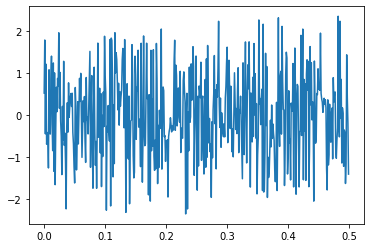

In [54]:
dt = 0.001; sim_len = 500
sim_times = np.arange(sim_len)*dt

setup = MassSpringDamper(k=k, c=c, m=m, dt=dt)

u = deepSI.deepSI.exp_design.multisine(sim_len, pmax=sim_len//2-1, n_crest_factor_optim=20)*1
# u = np.zeros(sim_len); u[10] = 10
# u = np.sin(np.arange(sim_len)*dt*wn)
# u = np.hstack(np.ones(sim_len))*20
data = setup.apply_experiment(deepSI.System_data(u=u))
plt.plot(sim_times, u)

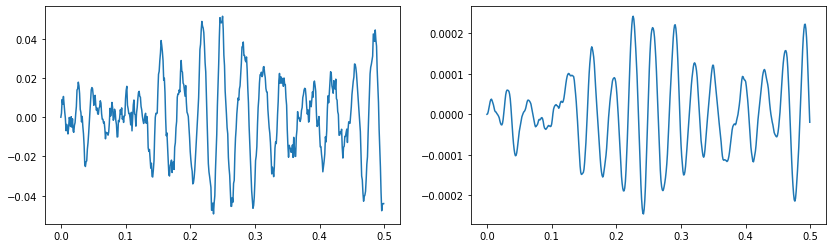

In [55]:


fig1 = plt.figure(figsize=[14, 4])
plt.subplot(1,2,1)
plt.plot(sim_times, data.y[:,0])
plt.subplot(1,2,2)
plt.plot(sim_times, data.y[:,1])